# Huber Regression Part 2

Huber Regression is the Huber loss. A loss function used in robust regression and is less sensitive to outliers in data than the squared error loss. A variant for classification is also sometimes used. Therefore, huber regression is a technique that is robust to outliers.  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AMD'
start = '2014-01-01'
end = '2018-08-27'

# Read data 
dataset = yf.download(symbol,start,end)

# View Columns
dataset.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,3.85,3.98,3.84,3.95,3.95,20548400
2014-01-03,3.98,4.00,3.88,4.00,4.00,22887200
2014-01-06,4.01,4.18,3.99,4.13,4.13,42398300
2014-01-07,4.19,4.25,4.11,4.18,4.18,42932100
2014-01-08,4.23,4.26,4.14,4.18,4.18,30678700


In [3]:
# Create more data
dataset['Increase_Decrease'] = np.where(dataset['Volume'].shift(-1) > dataset['Volume'],1,0)
dataset['Buy_Sell_on_Open'] = np.where(dataset['Open'].shift(-1) > dataset['Open'],1,-1)
dataset['Buy_Sell'] = np.where(dataset['Adj Close'].shift(-1) > dataset['Adj Close'],1,-1)
dataset['Return'] = dataset['Adj Close'].pct_change()
dataset = dataset.dropna()
dataset.head()

,Open,High,Low,Close,Adj Close,Volume,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Return
Date,,,,,,,,,,
2014-01-03,3.98,4.00,3.88,4.00,4.00,22887200,1,1,1,0.012658
2014-01-06,4.01,4.18,3.99,4.13,4.13,42398300,1,1,1,0.032500
2014-01-07,4.19,4.25,4.11,4.18,4.18,42932100,0,1,-1,0.012106
2014-01-08,4.23,4.26,4.14,4.18,4.18,30678700,0,-1,-1,0.000000
2014-01-09,4.20,4.23,4.05,4.09,4.09,30667600,0,-1,1,-0.021531


In [4]:
dataset.shape

(1170, 10)

In [5]:
X = dataset['Open']
y = dataset['Adj Close'] 

In [6]:
X = np.array(X).reshape(1170,-1)
y = np.array(y).reshape(1170,-1)

In [7]:
from sklearn.linear_model import HuberRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from numpy import absolute, arange

In [8]:
# Define the model
model = HuberRegressor()
# Define model evaluation
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# Evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# Change scores to be positive
scores = absolute(scores)
 

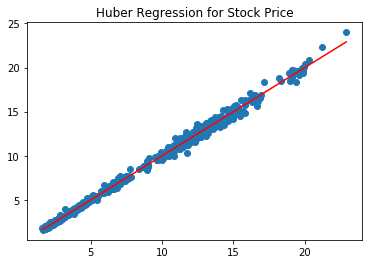

In [9]:
model.fit(X, y)
plt.scatter(X,y)
xaxis = arange(X.min(), X.max(), 0.01)
y_pred = model.predict(xaxis.reshape((len(xaxis), 1)))
plt.plot(xaxis, y_pred, color='r')
plt.title('Huber Regression for Stock Price')
plt.show()

In [10]:
def evaluate_model(X, y, model):
	# Define model evaluation
	cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
	# Evaluate model
	scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
	# Scores to be positive
	return absolute(scores)

In [11]:
results = evaluate_model(X, y, model) 
print('Average MAE: %.3f (%.3f)' % (results.mean(), results.std())) 

Average MAE: 0.146 (0.019)


In [12]:
model.coef_

array([0.99989982])

In [13]:
model.intercept_

-0.0006474743872614078

In [14]:
model.predict(y)

array([ 3.99895182,  4.12893891,  4.17893362, ..., 20.89725846,
       22.28712052, 23.97694984])

In [15]:
from sklearn.metrics import r2_score 
r2_score(X,y)

0.9976522993458272

In [16]:
y_pred = model.predict(y)

In [17]:
y_pred.shape

(1170,)

In [18]:
data = {'Actual':y.flatten(), 'Predicted':y_pred.flatten()}
df = pd.DataFrame(data)
print(df.head())
print(df.tail())

   Actual  Predicted
0    4.00   3.998952
1    4.13   4.128939
2    4.18   4.178934
3    4.18   4.178934
4    4.09   4.088943
         Actual  Predicted
1165  19.980000  19.977351
1166  20.400000  20.397309
1167  20.900000  20.897258
1168  22.290001  22.287121
1169  23.980000  23.976950


In [24]:
df['Predicted'].iloc[-1]

23.97694984455217